[*********************100%***********************]  1 of 1 completed


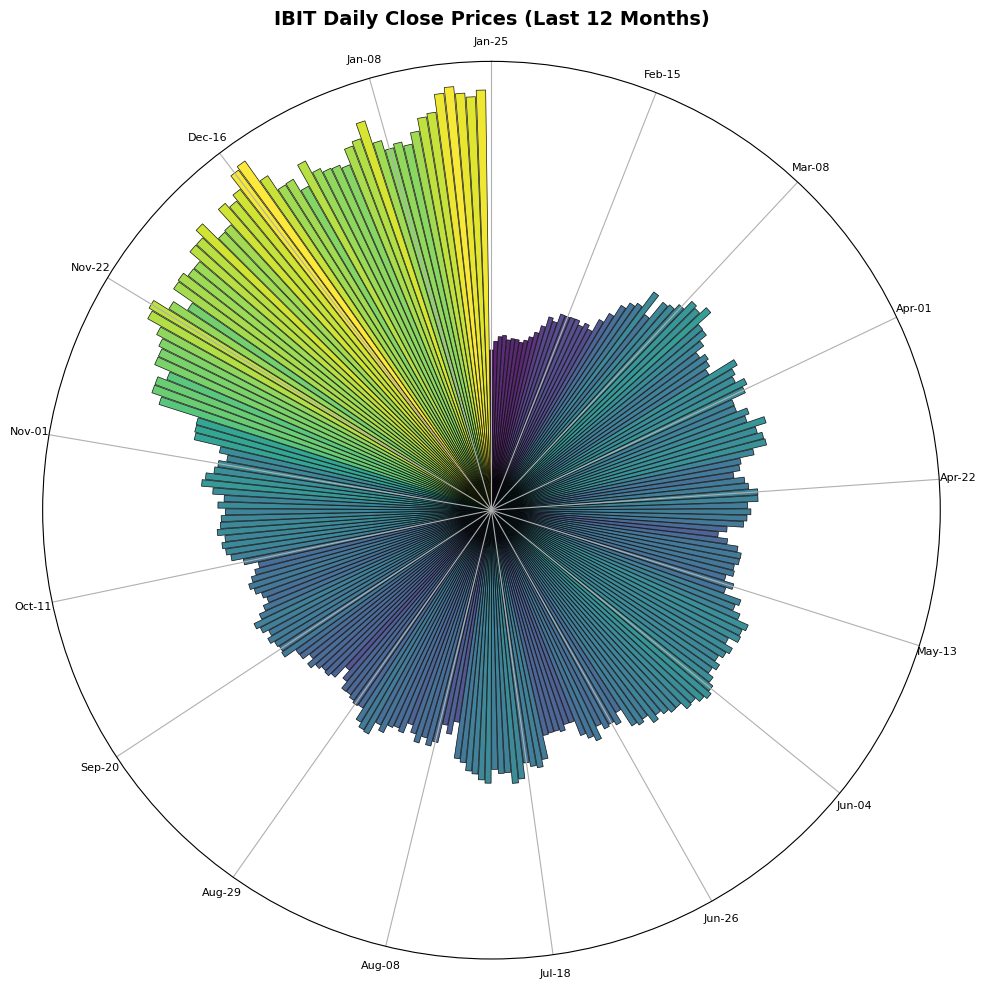

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from matplotlib import cm

# Step 1: Fetch the last 12 months of data for IBIT
ticker = "IBIT"
data = yf.download(ticker, period="1y", interval="1d", group_by='ticker')

# Flatten the multi-level index
if isinstance(data.columns, pd.MultiIndex):
    data.columns = data.columns.get_level_values(1)  # Extract the second level

# Step 2: Prepare the data
data = data[['Close']].dropna()  # Keep only the 'Close' column and drop missing values
data['Date'] = data.index  # Add the date as a column
data.reset_index(drop=True, inplace=True)  # Reset the index

# Debug the structure of the data
#print("Cleaned Data preview:")
#print(data.head())

# Step 3: Create angles for each day
num_days = len(data)
angles = np.linspace(0, 2 * np.pi, num_days, endpoint=False)

# Normalize close prices for color mapping
normalized_close = (data['Close'] - data['Close'].min()) / (data['Close'].max() - data['Close'].min())
normalized_close = normalized_close.to_numpy().squeeze()

# Generate colors for each bar
colors = [cm.viridis(value) for value in normalized_close]

# Debugging heights and colors
#print(f"First few heights (Close prices): {data['Close'].head()}")
#print(f"First few colors: {colors[:5]}")

# Step 4: Plotting the circular bar chart
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'projection': 'polar'})

# Add bars one by one to avoid issues with the color array
for angle, height, color in zip(angles, data['Close'], colors):
    ax.bar(
        angle,              # Angle for the bar
        height,             # Height corresponds to the close price
        width=(2 * np.pi / num_days) * 0.9,  # Slightly wider bars
        bottom=0,           # Start at the center
        color=color,        # Individual color for the bar
        edgecolor='black',
        linewidth=0.5,
        alpha=0.9
    )

# Customize the chart
ax.set_theta_zero_location('N')  # Set 0 degrees at the top
ax.set_theta_direction(-1)  # Clockwise direction
ax.set_yticks([])  # Hide radial grid lines
ax.set_xticks(angles[::15])  # Label every 15th day
ax.set_xticklabels(data['Date'].dt.strftime('%b-%d')[::15], fontsize=8, ha='center')

# Add title
plt.title(f"{ticker} Daily Close Prices (Last 12 Months)", fontsize=14, weight='bold', va='bottom')

plt.tight_layout()
plt.show()


[*********************100%***********************]  1 of 1 completed


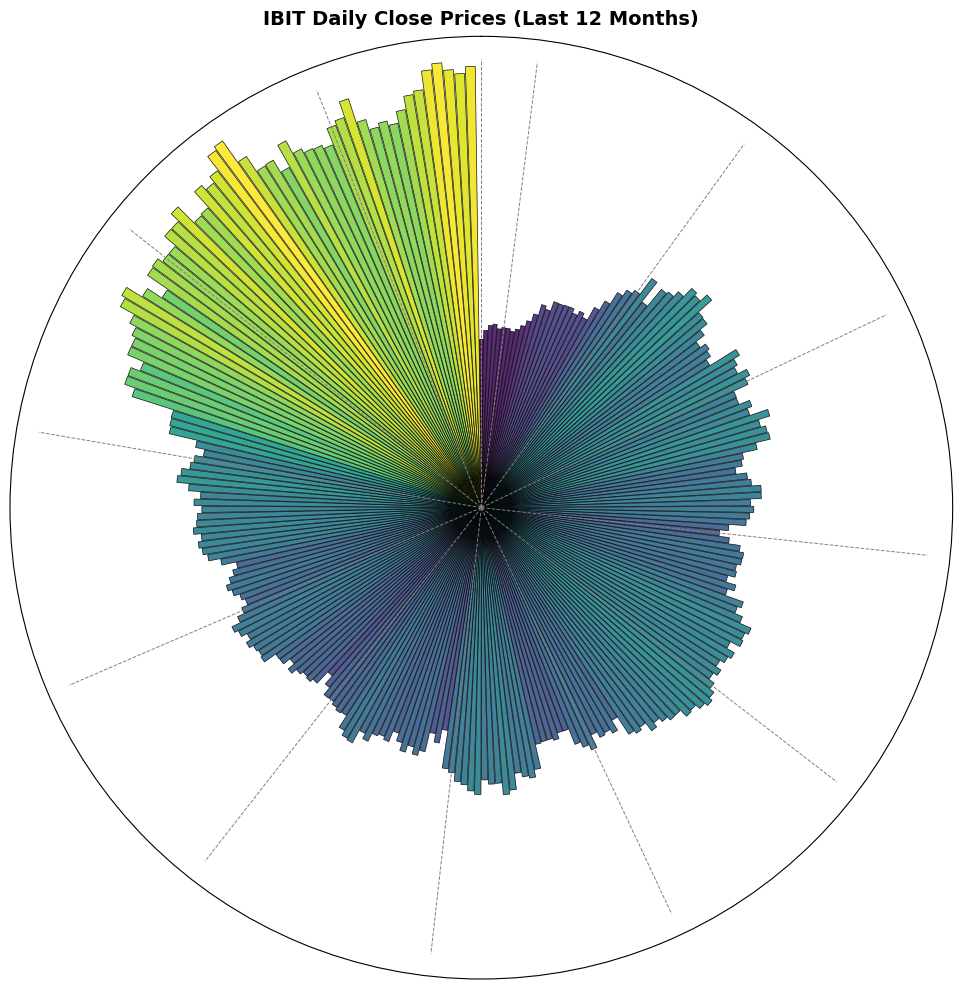

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from matplotlib import cm

# Step 1: Fetch the last 12 months of data for IBIT
ticker = "IBIT"
data = yf.download(ticker, period="1y", interval="1d", group_by='ticker')

# Flatten the multi-level index
if isinstance(data.columns, pd.MultiIndex):
    data.columns = data.columns.get_level_values(1)  # Extract the second level

# Step 2: Prepare the data
data = data[['Close']].dropna()  # Keep only the 'Close' column and drop missing values
data['Date'] = data.index  # Add the date as a column
data.reset_index(drop=True, inplace=True)  # Reset the index

# Step 3: Create angles for each day
num_days = len(data)
angles = np.linspace(0, 2 * np.pi, num_days, endpoint=False)

# Normalize close prices for color mapping
normalized_close = (data['Close'] - data['Close'].min()) / (data['Close'].max() - data['Close'].min())
normalized_close = normalized_close.to_numpy().squeeze()

# Generate colors for each bar
colors = [cm.viridis(value) for value in normalized_close]

# Step 4: Identify the start of each month
month_starts = data['Date'].dt.to_period('M').drop_duplicates().index
month_angles = angles[month_starts]

# Step 5: Plotting the circular bar chart
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'projection': 'polar'})

# Add bars
for angle, height, color in zip(angles, data['Close'], colors):
    ax.bar(
        angle,              # Angle for the bar
        height,             # Height corresponds to the close price
        width=(2 * np.pi / num_days) * 0.9,  # Slightly wider bars
        bottom=0,           # Start at the center
        color=color,        # Individual color for the bar
        edgecolor='black',
        linewidth=0.5,
        alpha=0.9
    )

# Add lines for the start of each month
for month_angle in month_angles:
    ax.plot([month_angle, month_angle], [0, data['Close'].max()], color='gray', linestyle='--', linewidth=0.7)

# Customize the chart
ax.set_theta_zero_location('N')  # Set 0 degrees at the top
ax.set_theta_direction(-1)  # Clockwise direction
ax.set_yticks([])  # Remove radial grid lines
ax.set_xticks([])  # Remove angular labels

# Add title
plt.title(f"{ticker} Daily Close Prices (Last 12 Months)", fontsize=14, weight='bold', va='bottom')

output_filename = "IBIT_close_prices.jpg"
plt.savefig(output_filename, format='jpg', dpi=300, bbox_inches='tight')

plt.tight_layout()
plt.show()
